In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

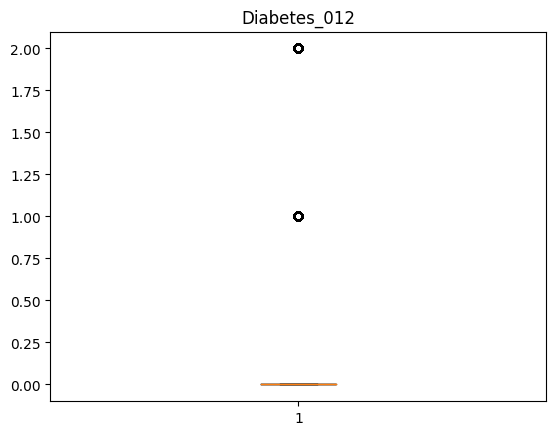

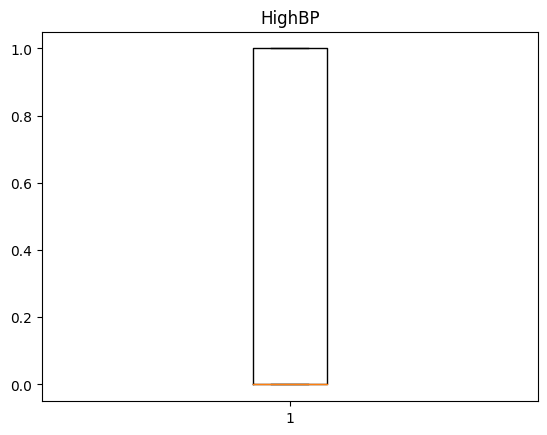

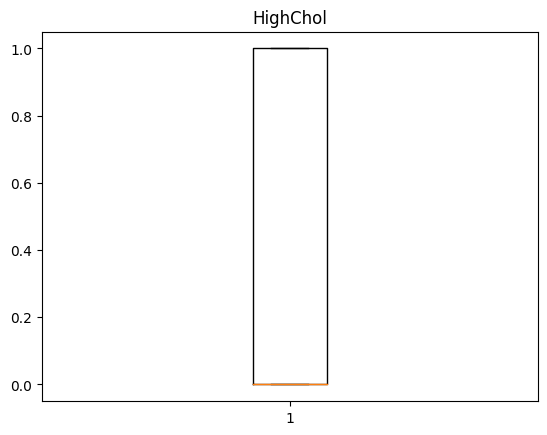

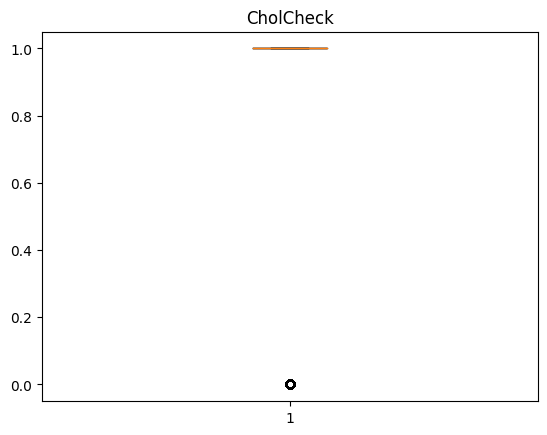

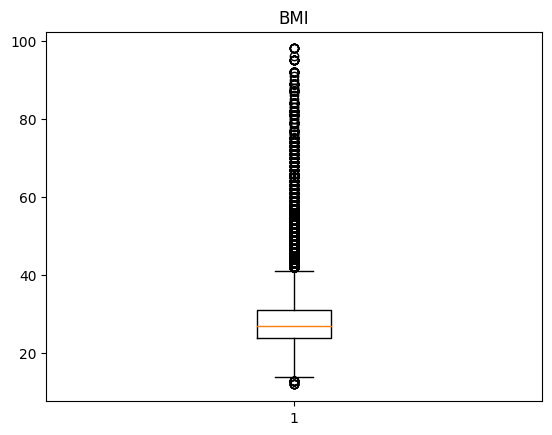

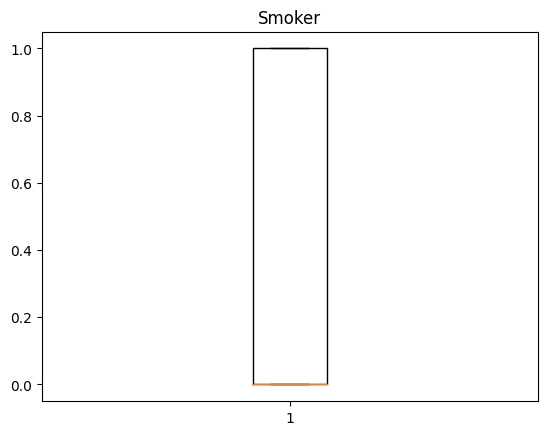

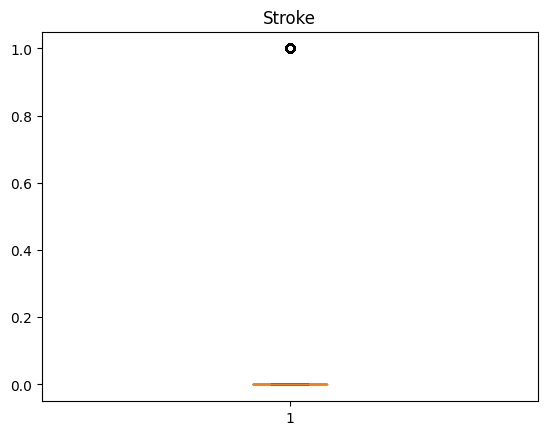

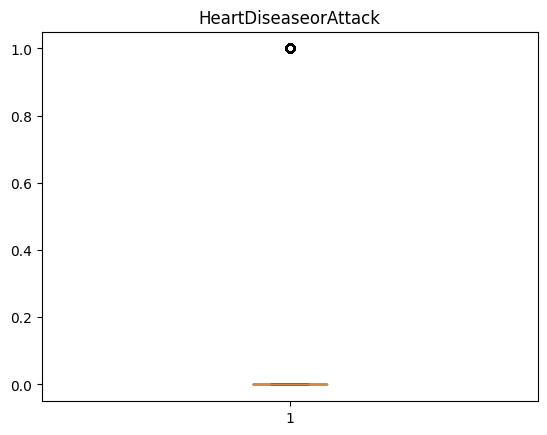

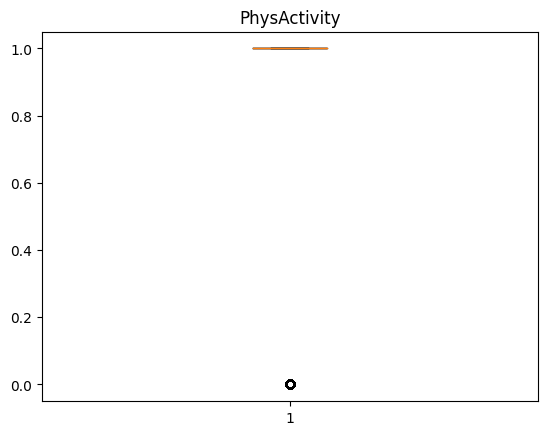

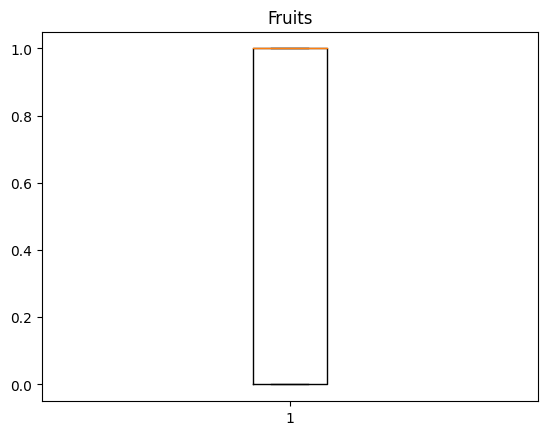

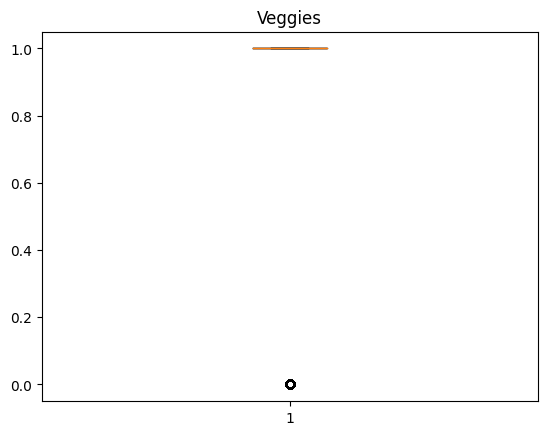

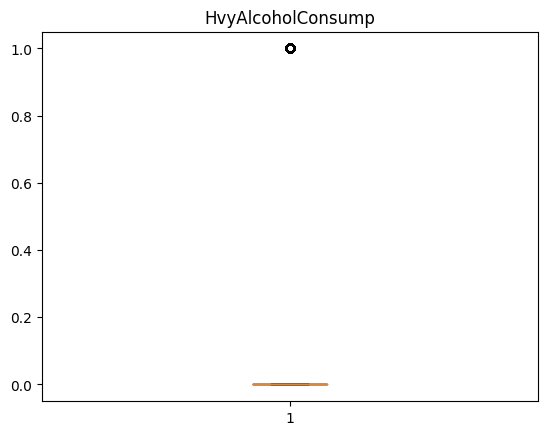

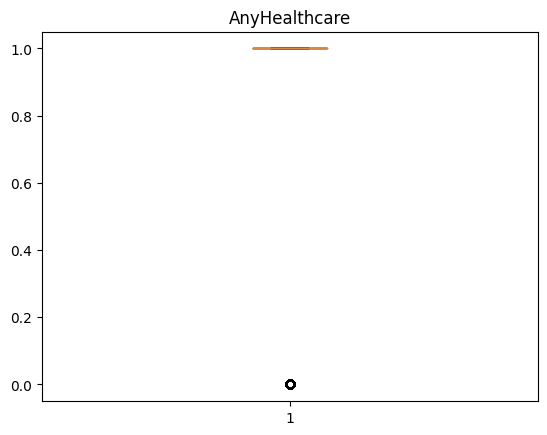

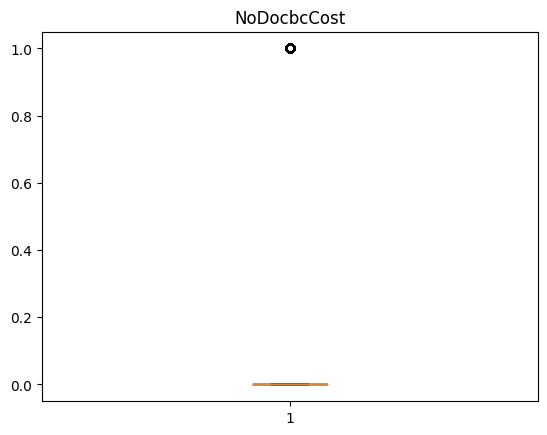

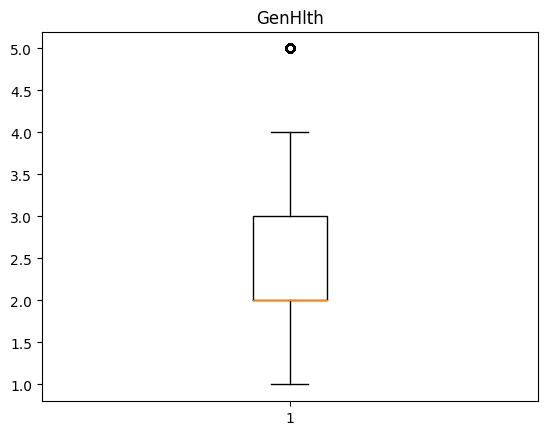

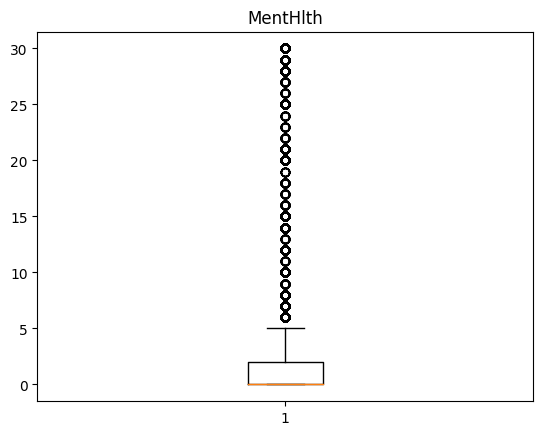

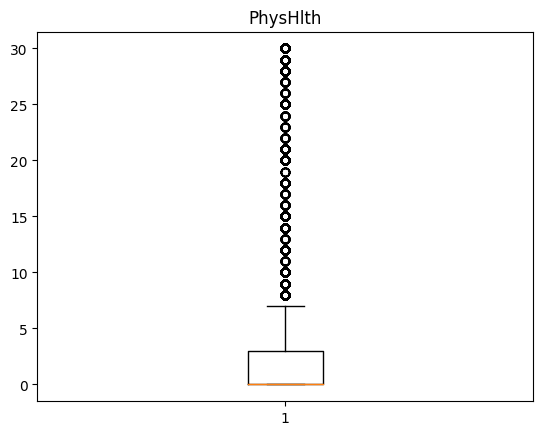

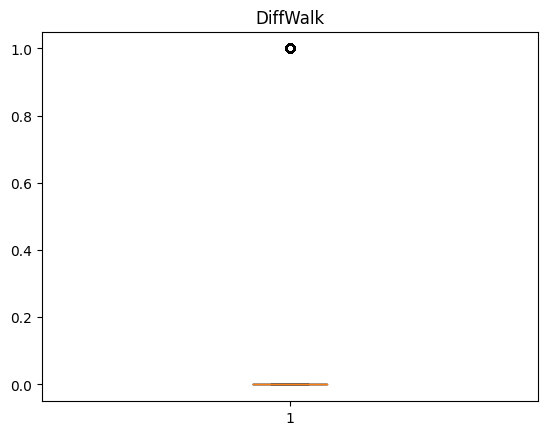

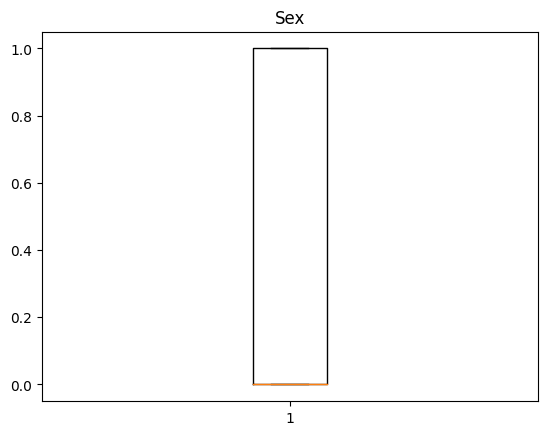

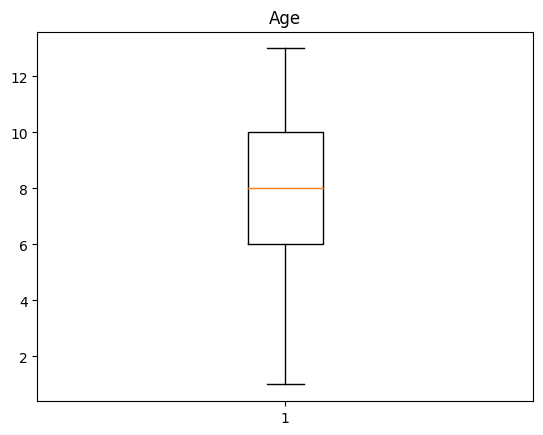

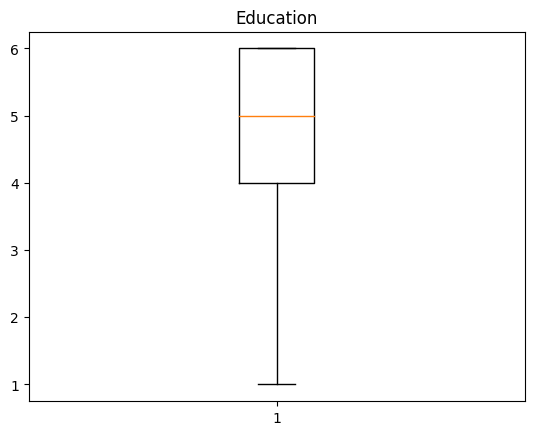

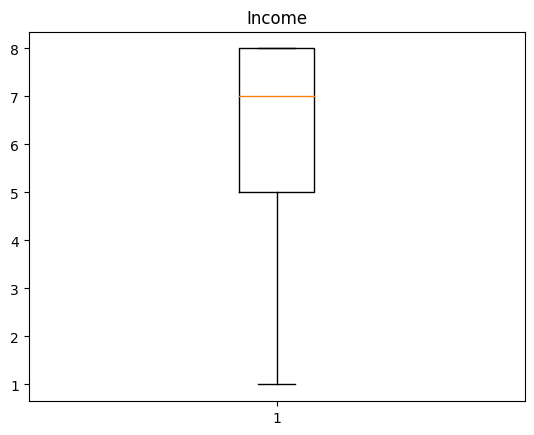

In [ ]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

##Univariate

Histogram

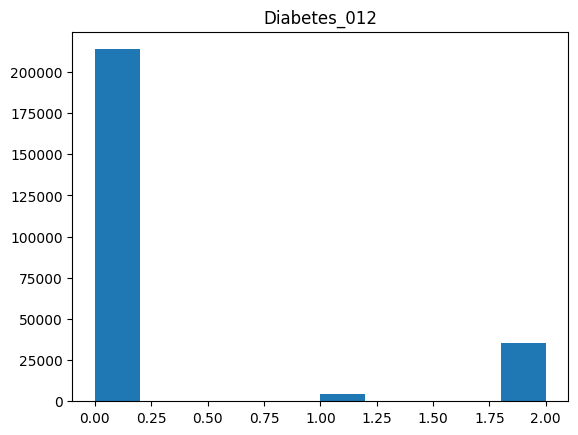

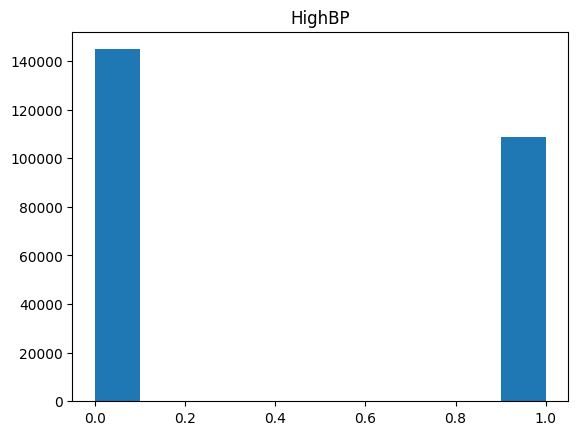

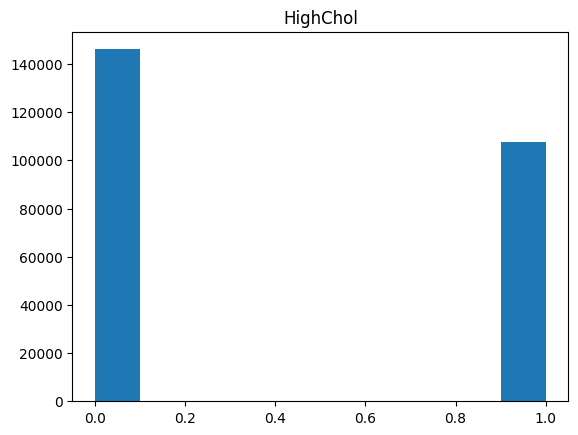

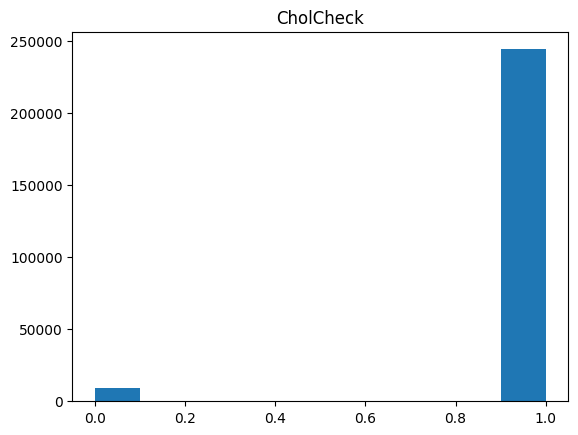

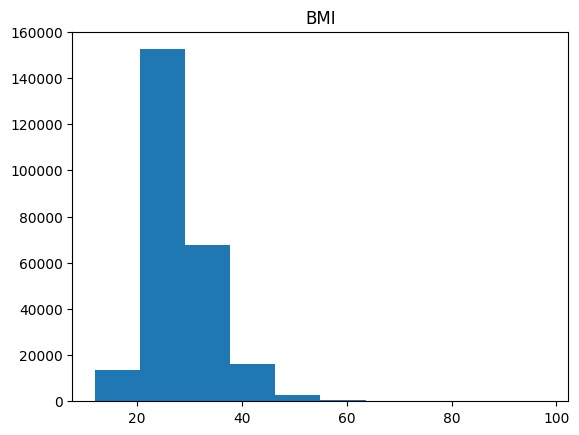

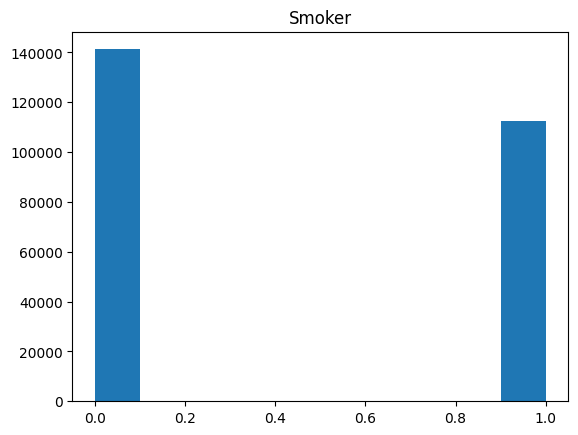

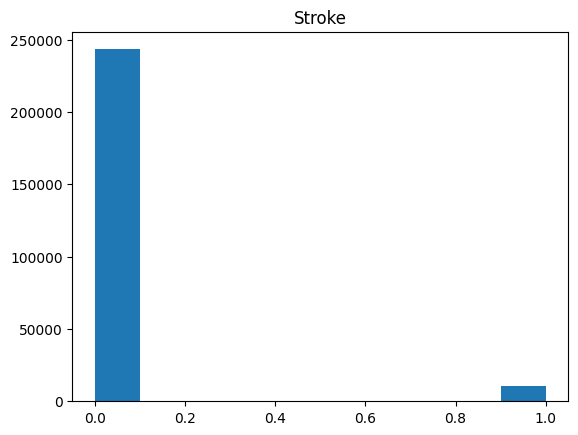

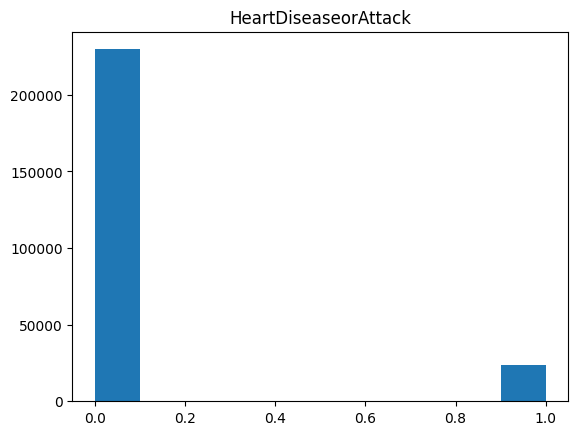

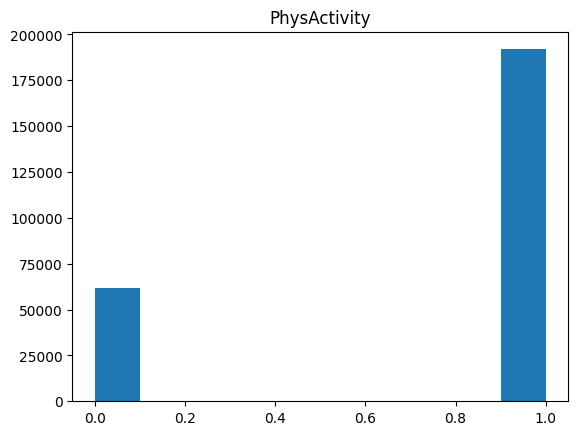

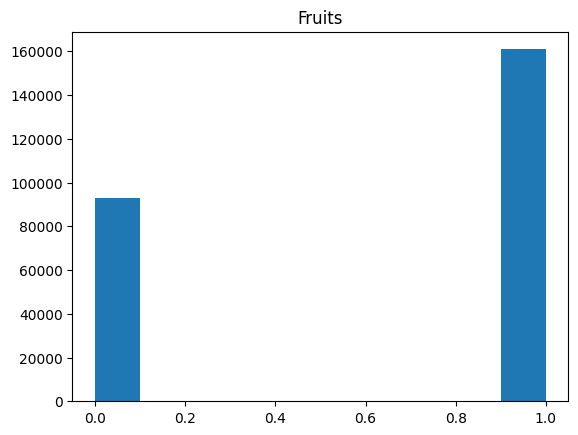

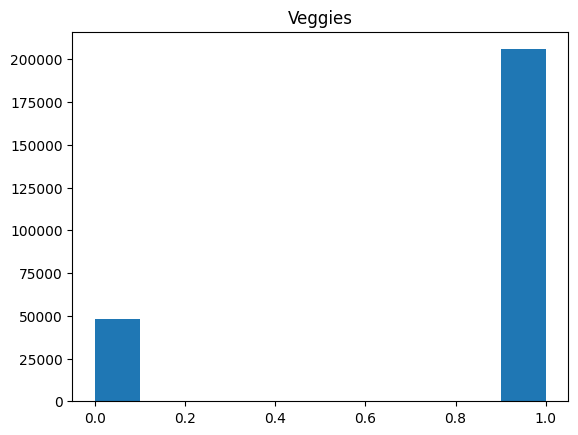

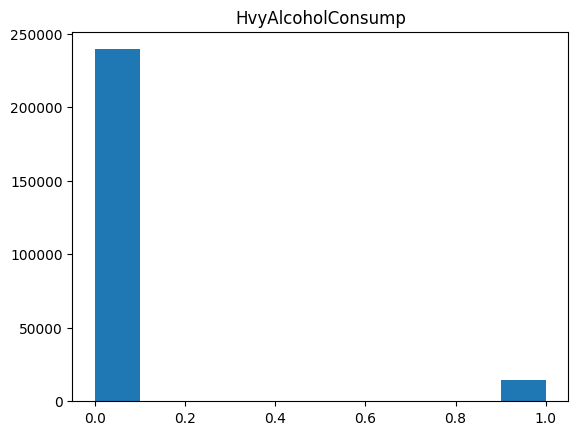

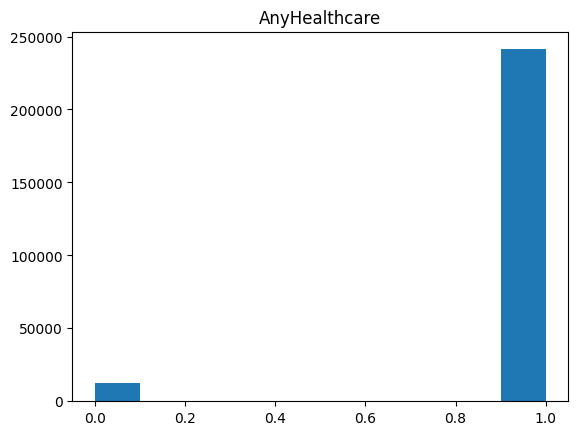

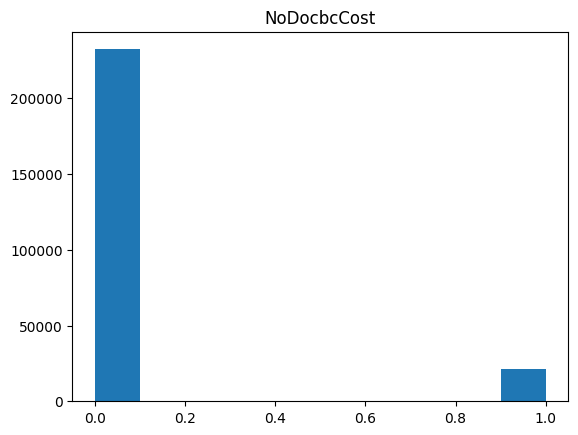

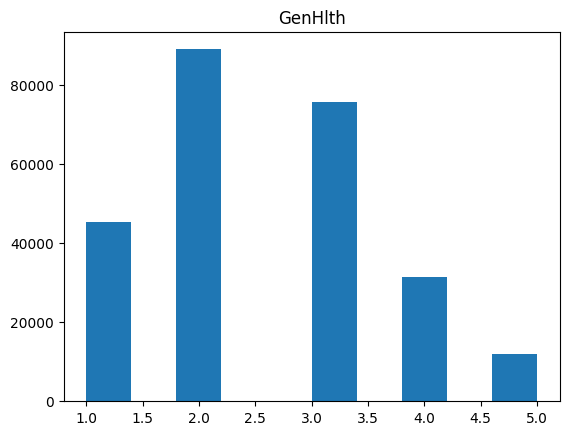

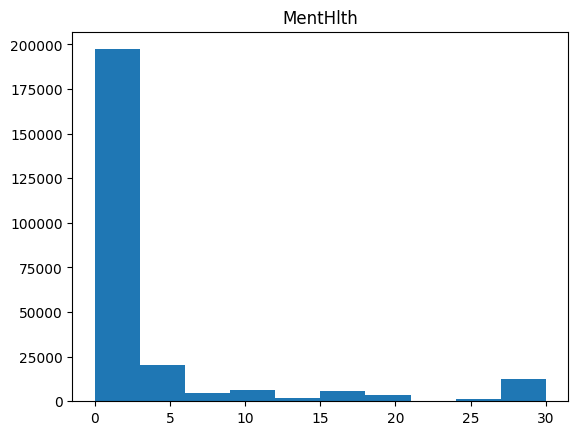

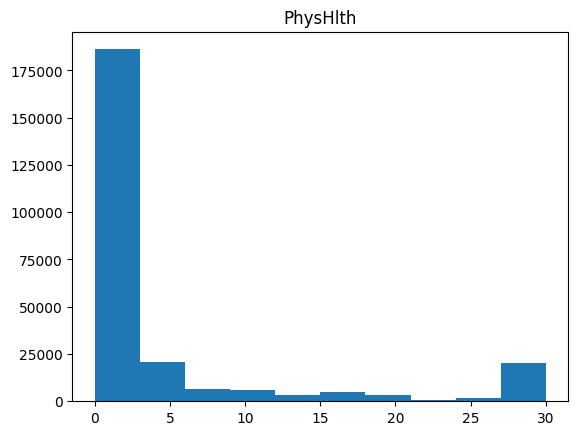

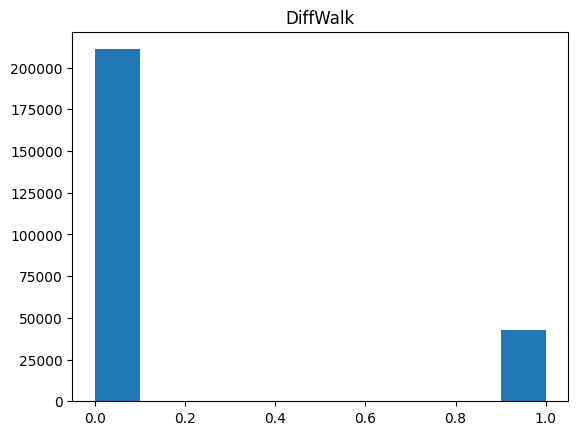

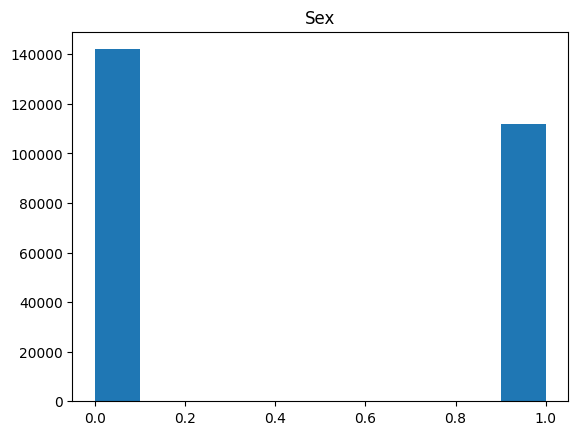

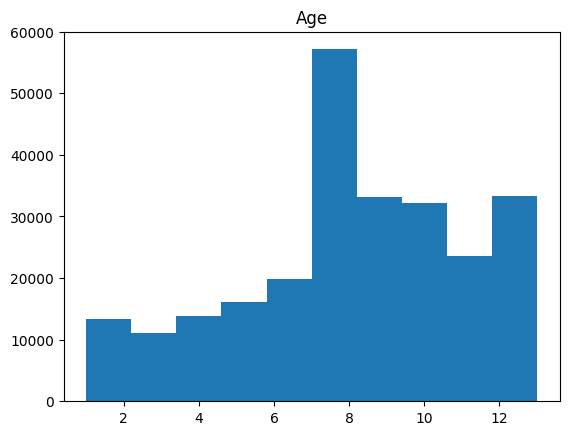

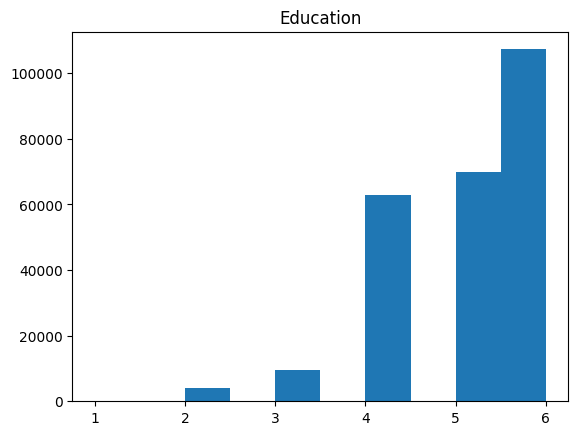

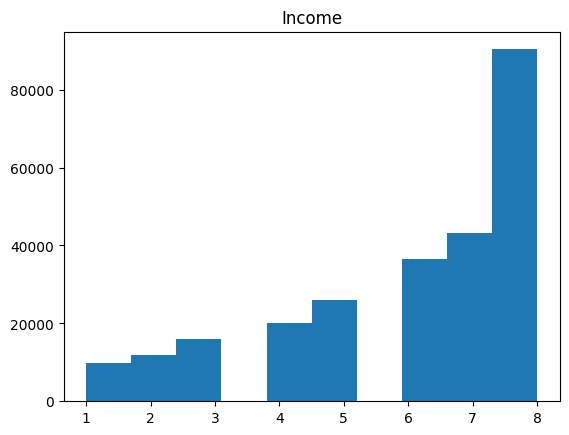

In [ ]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

Dist Plot

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


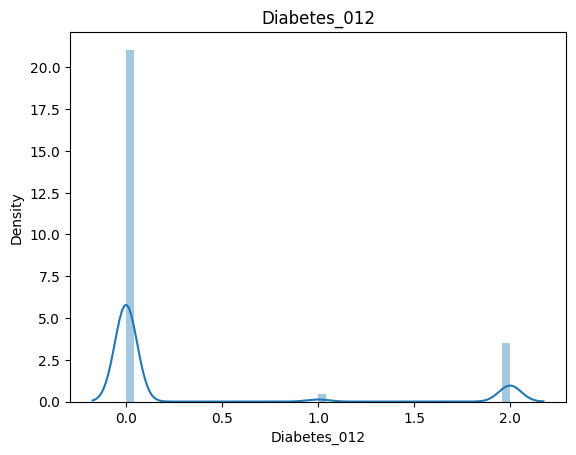

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


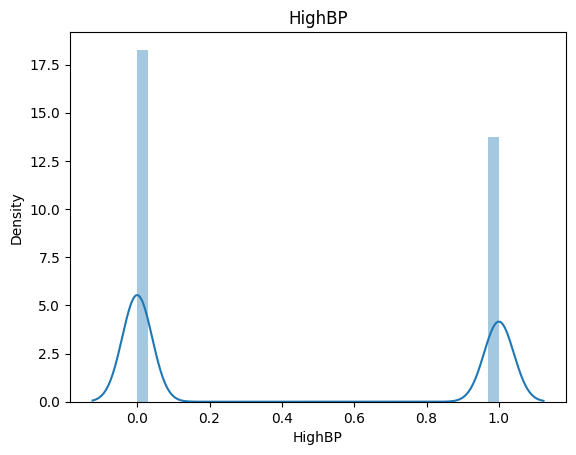

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


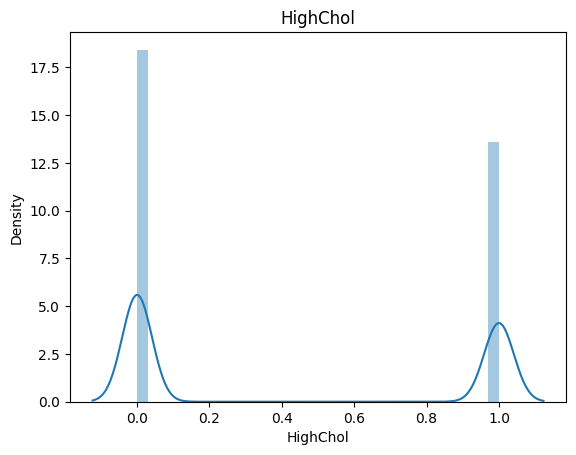

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


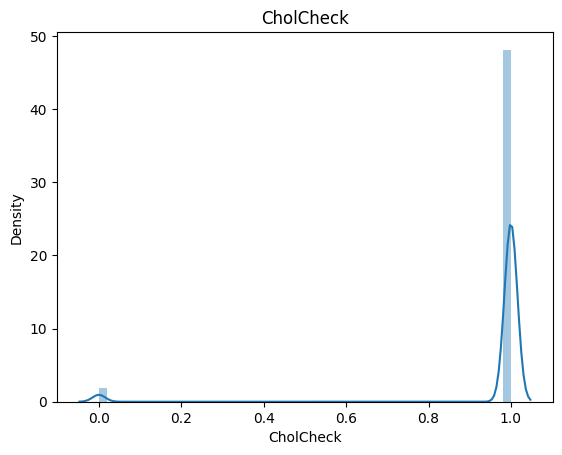

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


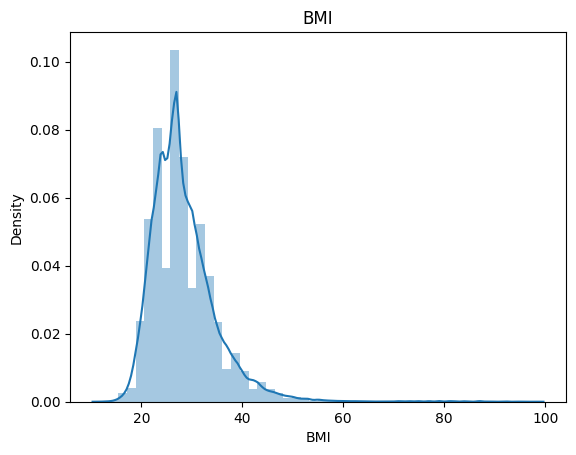

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


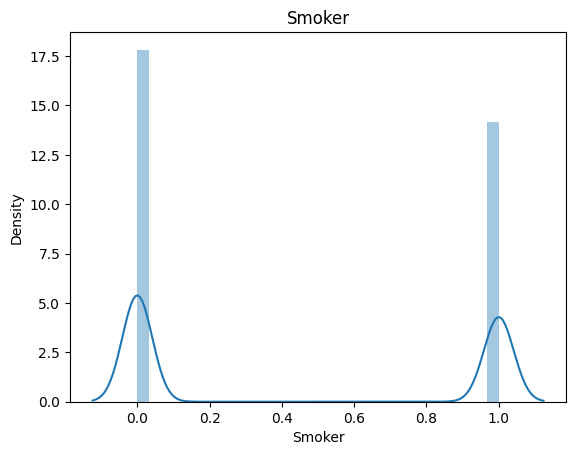

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


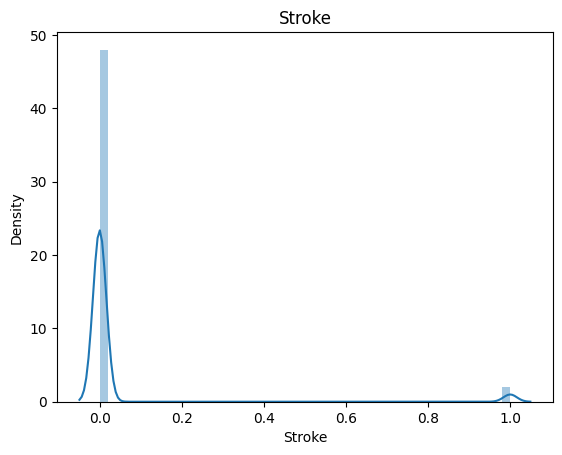

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


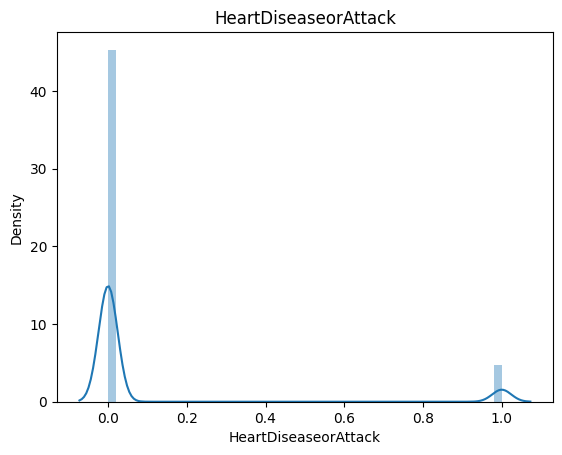

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


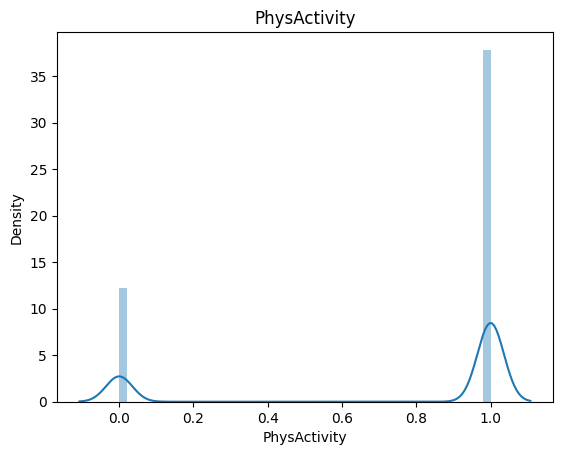

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


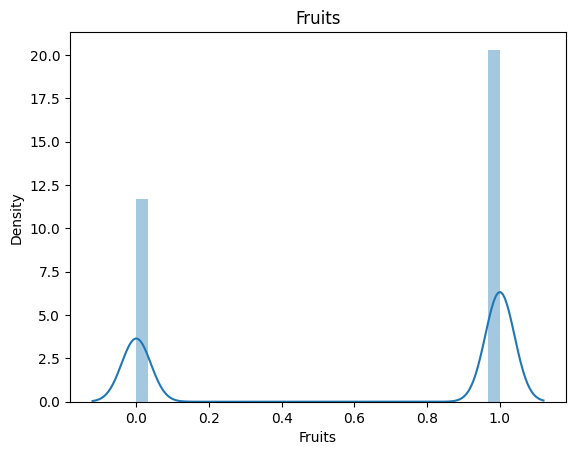

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


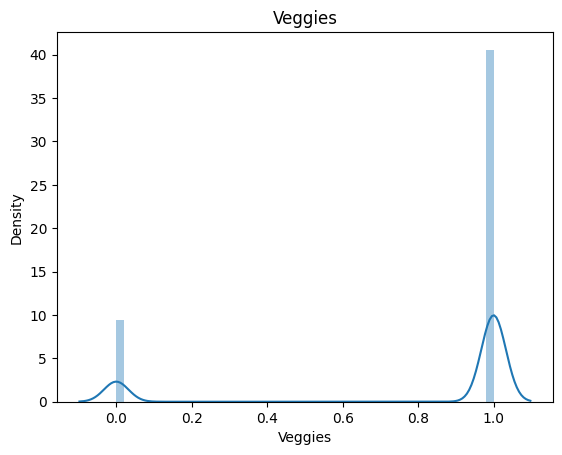

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


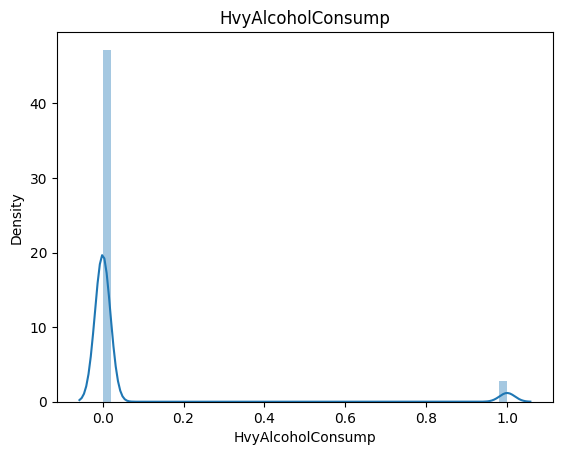

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


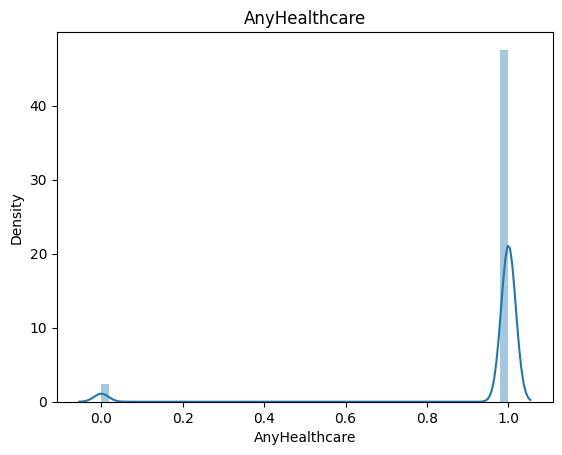

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


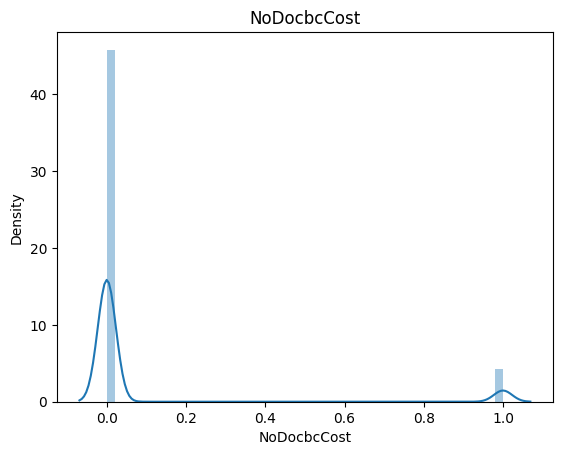

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


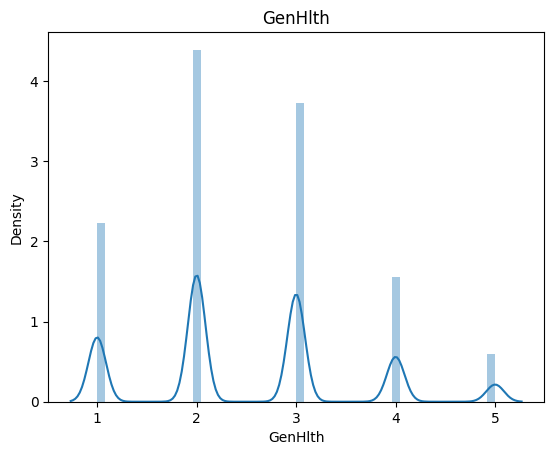

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


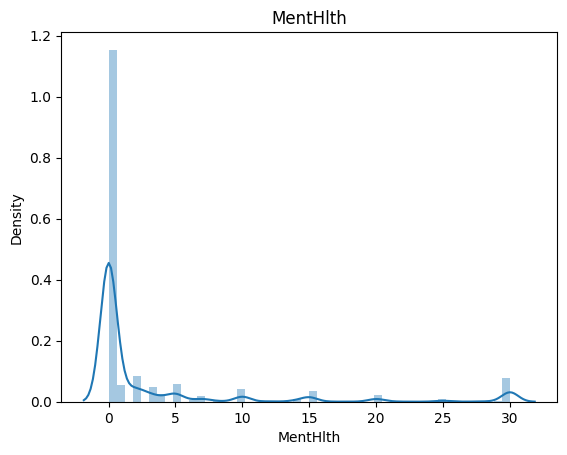

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


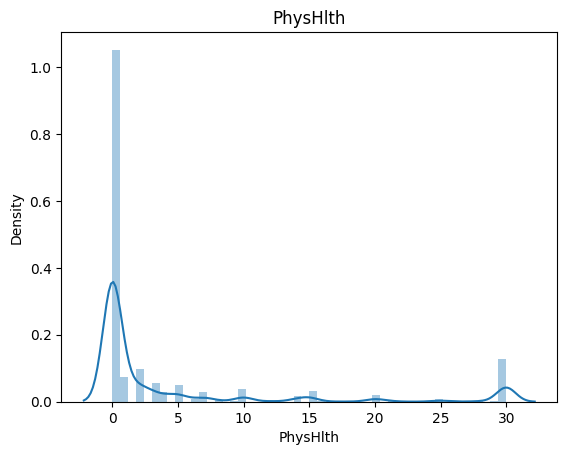

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


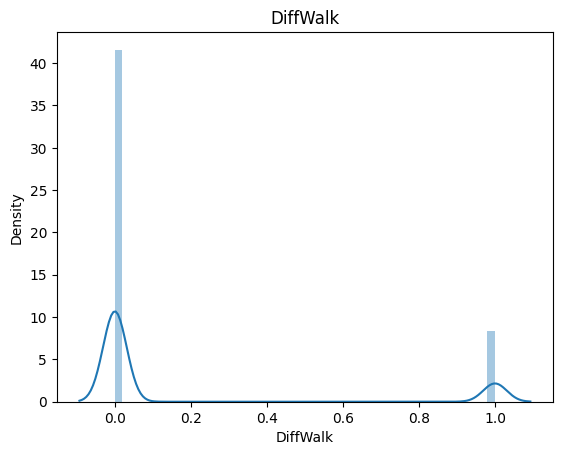

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


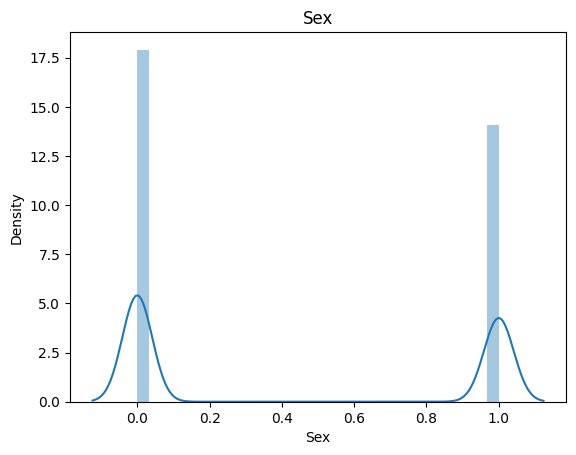

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


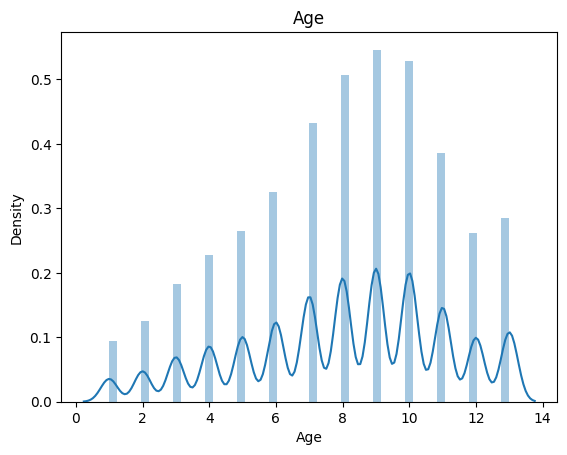

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


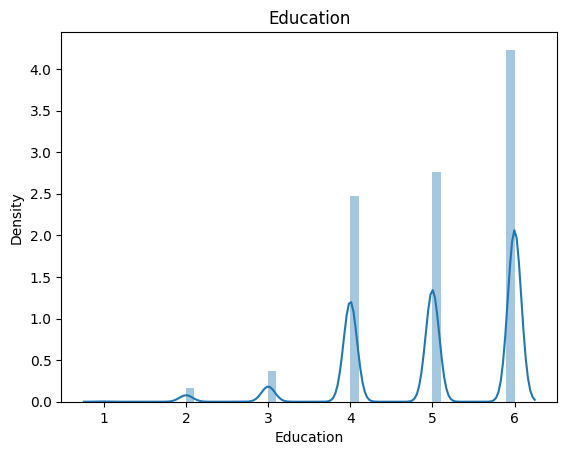

<ipython-input-12-94f142b91d73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


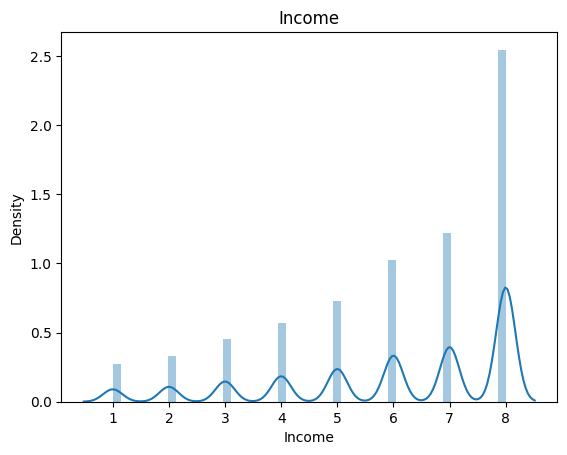

In [ ]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

##Bivariate

#Scatter Plot

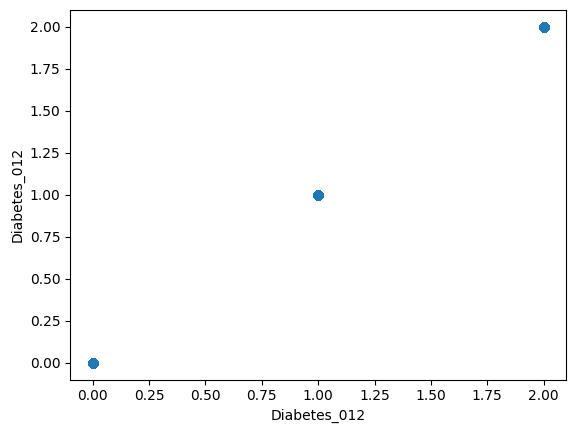

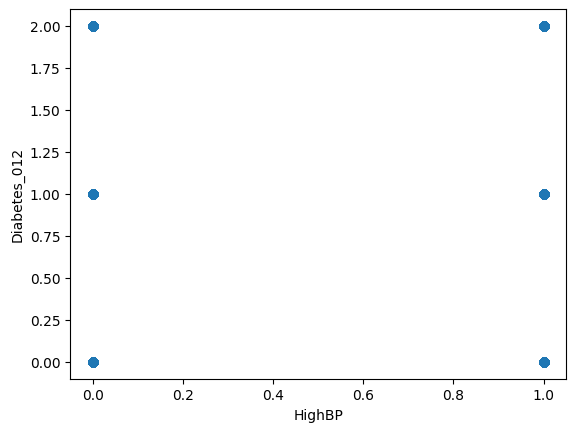

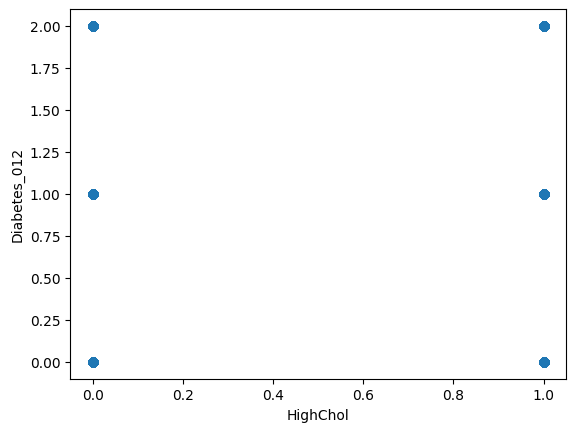

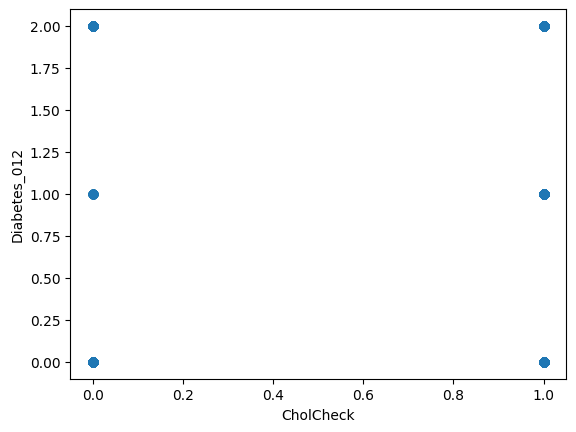

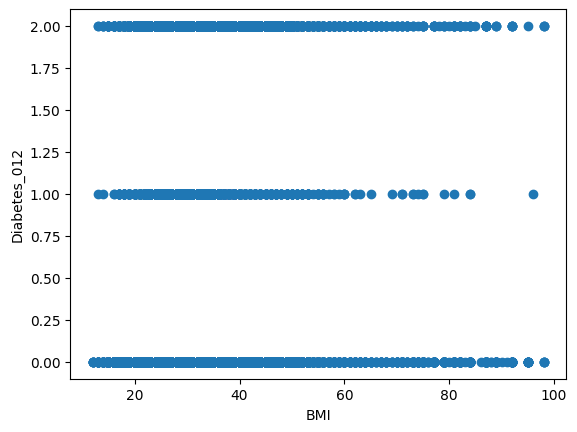

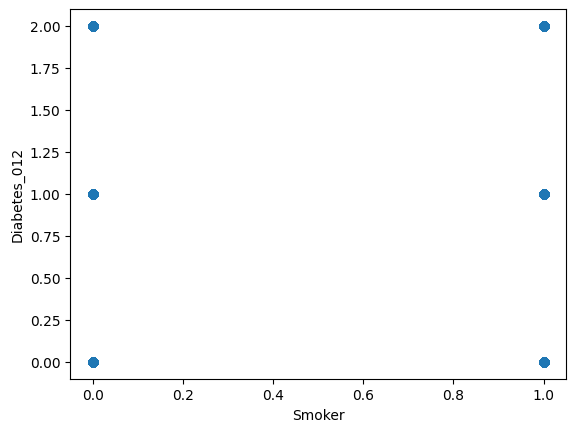

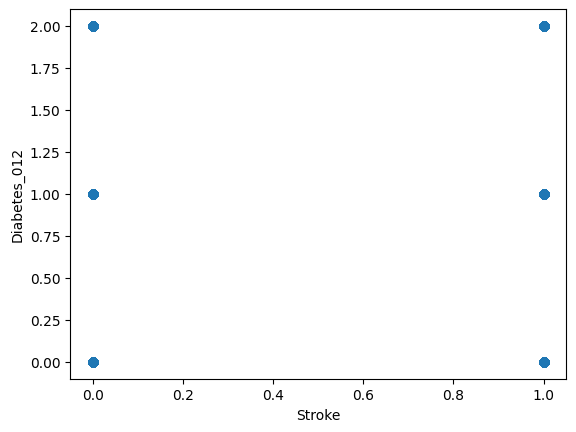

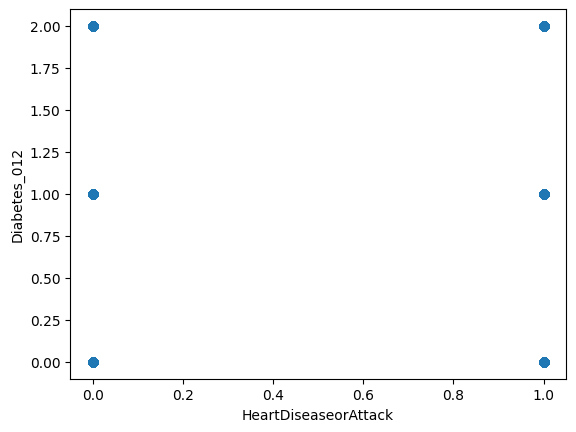

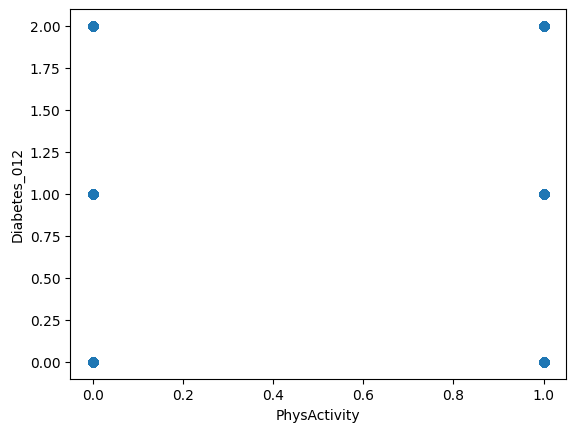

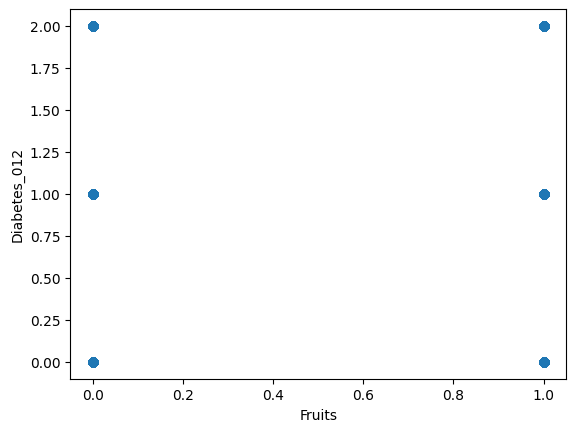

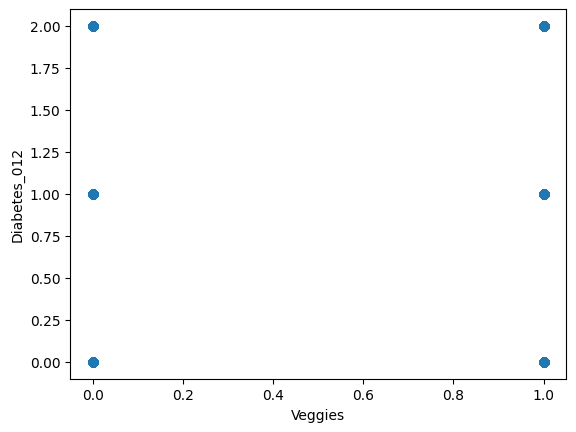

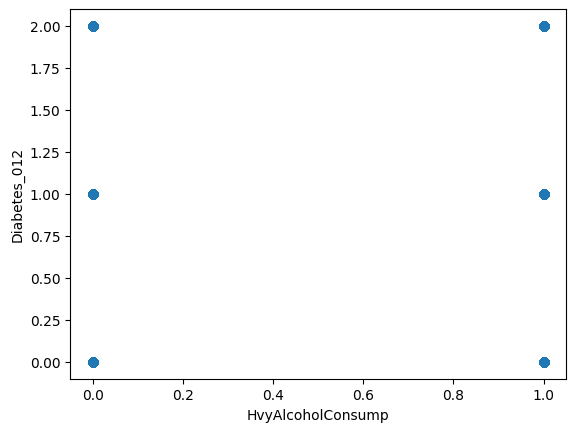

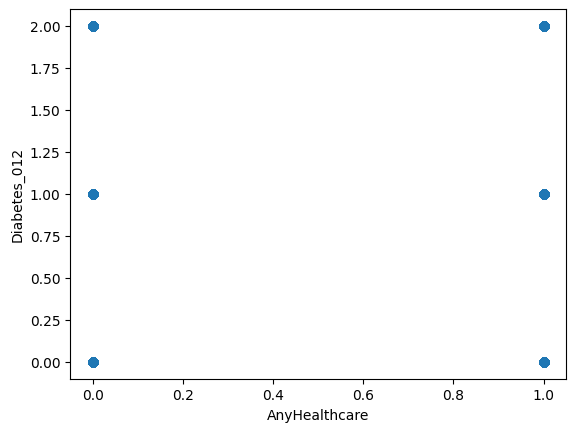

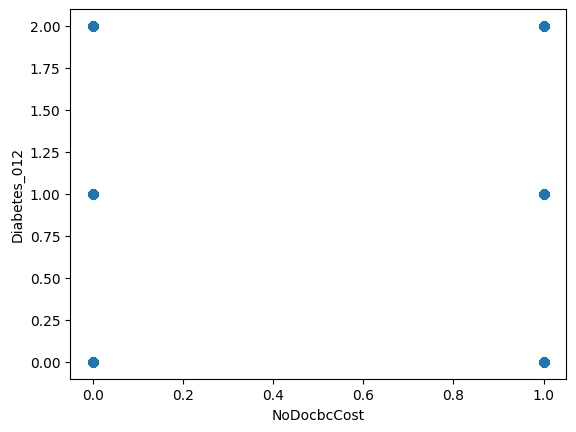

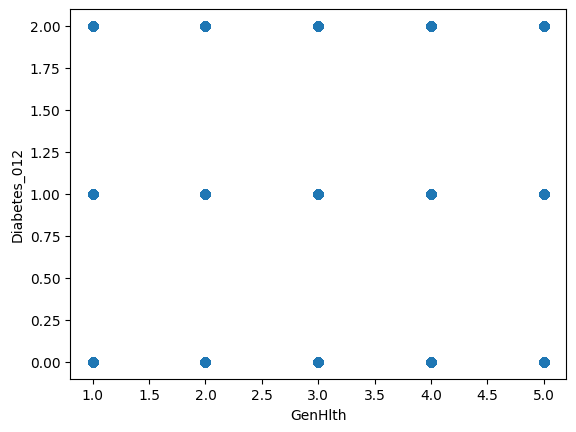

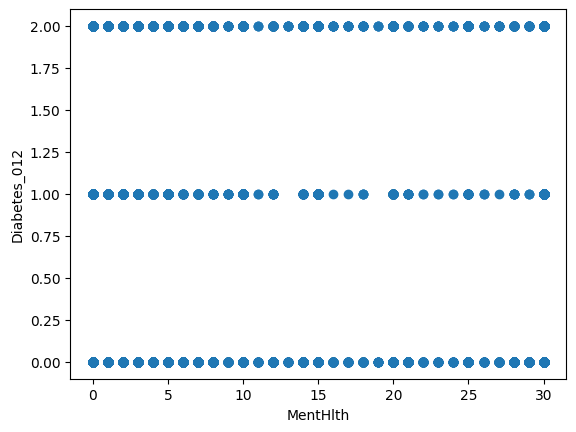

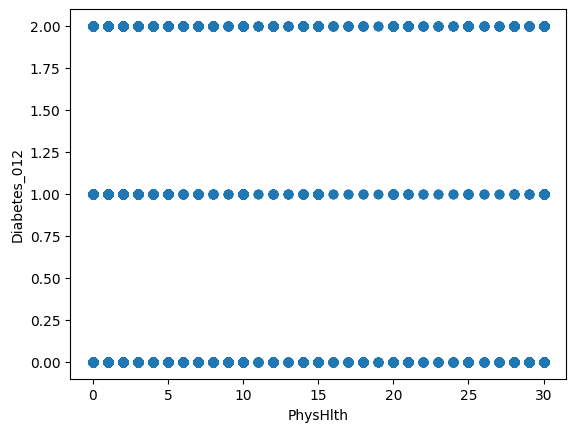

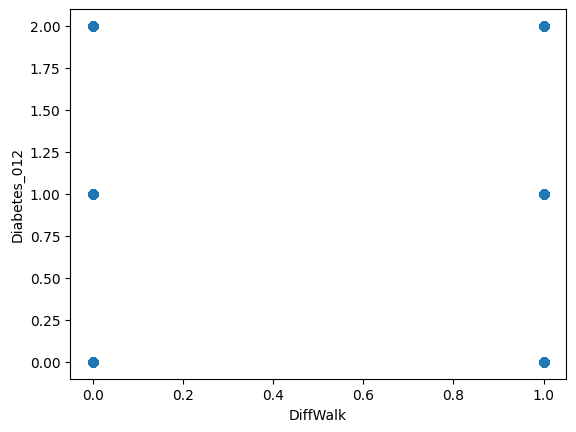

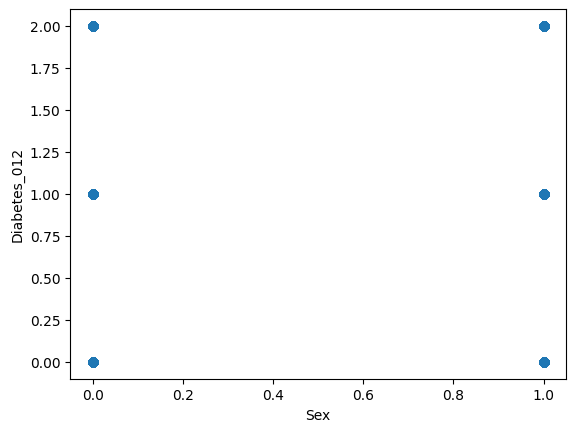

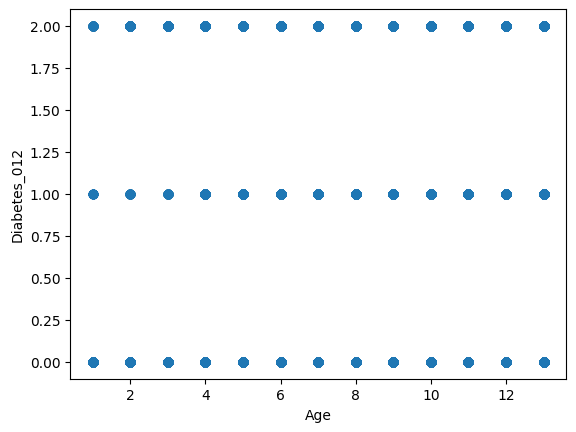

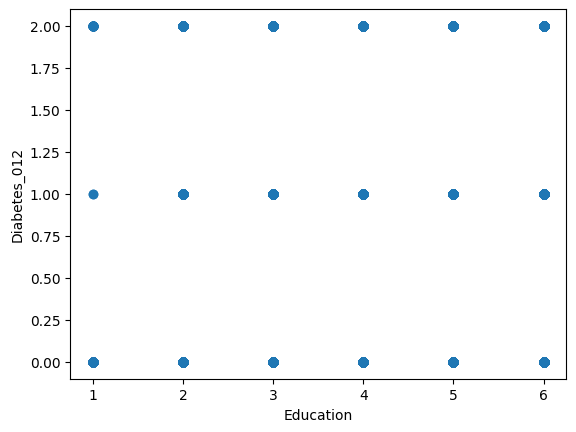

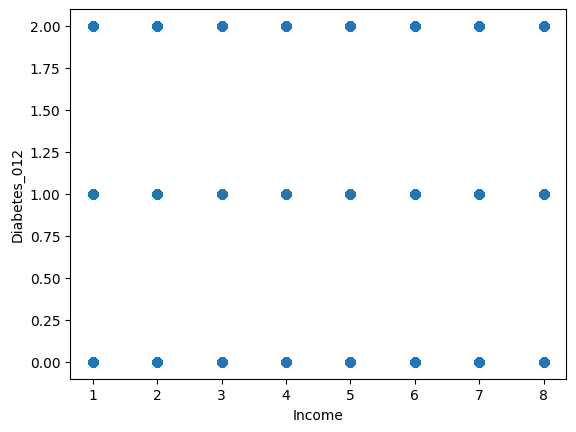

In [ ]:
for i in df.columns:
  plt.scatter(df[i],df['Diabetes_012'])
  plt.xlabel(i)
  plt.ylabel("Diabetes_012")
  plt.show()

##Multivariate

HeatMap

<Axes: >

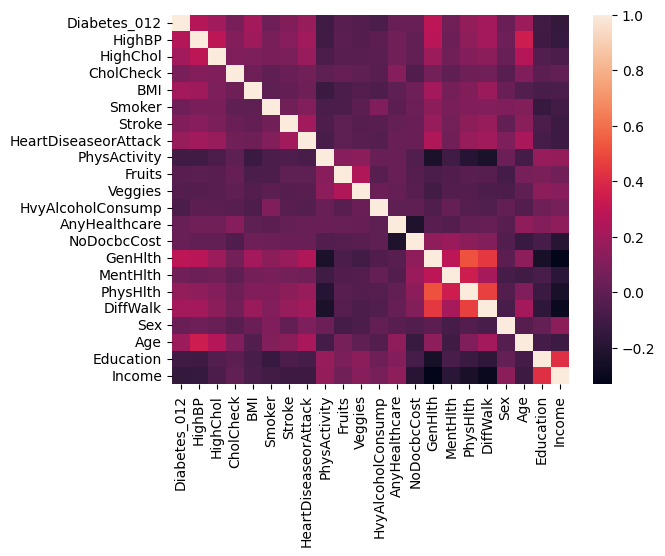

In [34]:
sns.heatmap(df.corr())

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.095675,1.124132,0.205356,1.667220,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,2.253111,1.879074,1.141300,2.095383,-0.885023,0.295241,-0.987588,-1.381324
1,-0.912679,-0.889575,-4.869594,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,-1.968149,...,-4.188578,3.126450,0.374618,-0.454434,-0.516791,-0.477240,-0.885023,-0.351213,1.026729,-2.337131
2,1.095675,1.124132,0.205356,-0.101037,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,-1.968149,...,0.238745,3.126450,2.253111,3.434746,2.799391,2.095383,-0.885023,0.295241,-0.987588,1.008193
3,1.095675,-0.889575,0.205356,-0.248391,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,-0.885023,0.941695,-1.994746,0.052387
4,1.095675,1.124132,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.065516,-0.516791,-0.477240,-0.885023,0.941695,0.019571,-0.903420
5,1.095675,1.124132,0.205356,-0.543101,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.295713,-0.477240,1.129914,0.618468,1.026729,1.008193
6,1.095675,-0.889575,0.205356,0.193673,1.071208,-0.216455,-0.339257,-1.658403,-1.258473,-1.968149,...,0.238745,-0.319852,0.374618,-0.454434,1.030760,-0.477240,-0.885023,0.295241,1.026729,0.530290
7,1.095675,1.124132,0.205356,-0.543101,1.071208,-0.216455,-0.339257,0.602990,-1.258473,0.508092,...,0.238745,-0.319852,0.374618,-0.454434,-0.516791,2.095383,-0.885023,0.941695,-0.987588,-0.903420
8,1.095675,1.124132,0.205356,0.193673,1.071208,-0.216455,2.947618,-1.658403,0.794614,0.508092,...,0.238745,-0.319852,2.253111,3.434746,2.799391,2.095383,-0.885023,0.295241,0.019571,-2.337131
9,-0.912679,-0.889575,0.205356,-0.690456,-0.933526,-0.216455,-0.339257,-1.658403,-1.258473,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,-0.516791,-0.477240,1.129914,-0.027986,-0.987588,-1.381324


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
x_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
75704,1.095675,1.124132,0.205356,-0.985165,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,0.508092,...,0.238745,-0.319852,-0.564629,-0.454434,0.035906,-0.477240,-0.885023,0.295241,0.019571,1.008193
418323,1.095675,1.124132,0.205356,0.525318,-0.933526,-0.216455,2.947618,0.602990,0.794614,0.508092,...,0.238745,-0.319852,1.842346,-0.454434,2.799391,-0.477240,1.129914,0.436599,-0.547123,0.739294
429019,1.095675,1.124132,0.205356,1.051430,1.071208,-0.216455,-0.339257,0.602990,0.794614,0.508092,...,0.238745,-0.319852,1.313865,-0.454434,-0.516791,2.095383,-0.885023,0.145553,-0.160675,-2.337131
305954,-0.912679,1.124132,0.205356,1.372510,1.071208,4.619907,2.947618,0.602990,0.794614,-1.968149,...,0.238745,-0.319852,1.313865,-0.454434,0.256984,-0.477240,-0.885023,-0.027986,1.026729,-2.337131
224955,-0.912679,-0.889575,0.205356,-0.539582,-0.933526,-0.216455,-0.339257,-1.658403,0.794614,0.508092,...,0.238745,-0.319852,0.145414,2.138353,-0.098969,-0.477240,-0.885023,-0.717738,-0.226206,1.008193


In [ ]:
x_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.5777511086393373
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.69     32891
         1.0       0.51      0.55      0.53     55347
         2.0       0.58      0.54      0.56     48416

    accuracy                           0.58    136654
   macro avg       0.60      0.59      0.59    136654
weighted avg       0.58      0.58      0.58    136654



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model2 = RandomForestClassifier(n_estimators=100)

model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9567228182124197
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     32891
         1.0       0.98      0.98      0.98     55347
         2.0       0.94      0.94      0.94     48416

    accuracy                           0.96    136654
   macro avg       0.95      0.95      0.95    136654
weighted avg       0.96      0.96      0.96    136654



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model3 = DecisionTreeClassifier()

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8744420214556471
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     32891
         1.0       0.89      0.92      0.90     55347
         2.0       0.85      0.83      0.84     48416

    accuracy                           0.87    136654
   macro avg       0.87      0.87      0.87    136654
weighted avg       0.87      0.87      0.87    136654



In [29]:
xgb_model= XGBClassifier(max_depth=20)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
y_pred_test_xgb = xgb_model.predict(x_test)

print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     32891
         1.0       0.98      0.98      0.98     55347
         2.0       0.96      0.94      0.95     48416

    accuracy                           0.96    136654
   macro avg       0.95      0.96      0.96    136654
weighted avg       0.96      0.96      0.96    136654



In [37]:
pickle.dump(xgb_model,open('diabetes.pkl','wb'))

In [33]:
print("Prediction:",xgb_model.predict([[1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3]]))

Prediction: [2]


In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.12033310404378943
Root Mean Squared Error (RMSE): 0.34689062259419673
Mean Absolute Error (MAE): 0.06896248920631669
R-squared (R2): 0.7932696586316419


In [40]:
from sklearn.metrics import accuracy_score

y_pred_logistic = model1.predict(x_test)
y_pred_rf = model2.predict(x_test)
y_pred_dt = model3.predict(x_test)
y_pred_xgboost = xgb_model.predict(x_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_xgboost = accuracy_score(y_test, y_pred_test_xgb)

print("Accuracy - Logistic Regression:", accuracy_logistic)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - Decision Tree:", accuracy_dt)
print("Accuracy - XGBoost:", accuracy_xgboost)

Accuracy - Logistic Regression: 0.5777511086393373
Accuracy - Random Forest: 0.9567228182124197
Accuracy - Decision Tree: 0.8744420214556471
Accuracy - XGBoost: 0.9589181436328245


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_test_xgb)

print("Confusion Matrix - Logistic Regression:\n", confusion_matrix_logistic)
print("Confusion Matrix - Random Forest:\n", confusion_matrix_rf)
print("Confusion Matrix - Decision Tree:\n", confusion_matrix_dt)
print("Confusion Matrix - XGBoost:\n", confusion_matrix_xgboost)

Confusion Matrix - Logistic Regression:
 [[22321  9357  1213]
 [ 7435 30675 17237]
 [ 1904 20556 25956]]
Confusion Matrix - Random Forest:
 [[30702    47  2142]
 [  465 54318   564]
 [ 1368  1328 45720]]
Confusion Matrix - Decision Tree:
 [[28483  1080  3328]
 [  747 50851  3749]
 [ 2848  5406 40162]]
Confusion Matrix - XGBoost:
 [[31211    39  1641]
 [  668 54265   414]
 [ 1799  1053 45564]]


In [42]:
from sklearn.metrics import classification_report

classification_rep_logistic = classification_report(y_test, y_pred_logistic)
classification_rep_rf = classification_report(y_test, y_pred_rf)
classification_rep_dt = classification_report(y_test, y_pred_dt)
classification_rep_xgboost = classification_report(y_test, y_pred_test_xgb)

print("Classification Report - Logistic Regression:\n", classification_rep_logistic)
print("Classification Report - Random Forest:\n", classification_rep_rf)
print("Classification Report - Decision Tree:\n", classification_rep_dt)
print("Classification Report - XGBoost:\n", classification_rep_xgboost)

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.69     32891
         1.0       0.51      0.55      0.53     55347
         2.0       0.58      0.54      0.56     48416

    accuracy                           0.58    136654
   macro avg       0.60      0.59      0.59    136654
weighted avg       0.58      0.58      0.58    136654

Classification Report - Random Forest:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     32891
         1.0       0.98      0.98      0.98     55347
         2.0       0.94      0.94      0.94     48416

    accuracy                           0.96    136654
   macro avg       0.95      0.95      0.95    136654
weighted avg       0.96      0.96      0.96    136654

Classification Report - Decision Tree:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     32891
   